<a href="https://www.kaggle.com/code/praths71018/eye-disease-detection?scriptVersionId=171246563" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eye-disease-deep-learning-dataset/dataset/labels.csv
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/623.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/208.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/473.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/333.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/537.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/45.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/369.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/56.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/654.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/89.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/20.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/275.jpg
/kaggle/input/eye-disease-deep-learning-dataset/dataset/images/212.jpg
/kaggle/input/

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

2024-04-10 00:59:44.123302: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 00:59:44.123399: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 00:59:44.292875: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
path='/kaggle/input/eye-disease-deep-learning-dataset/dataset/labels.csv'
df=pd.read_csv(path)
df.head()

name  category  type  grade
0  1.jpg         0     4      3
1  2.jpg         0     4      3
2  3.jpg         0     2      2
3  4.jpg         0     2      1
4  5.jpg         0     1      3

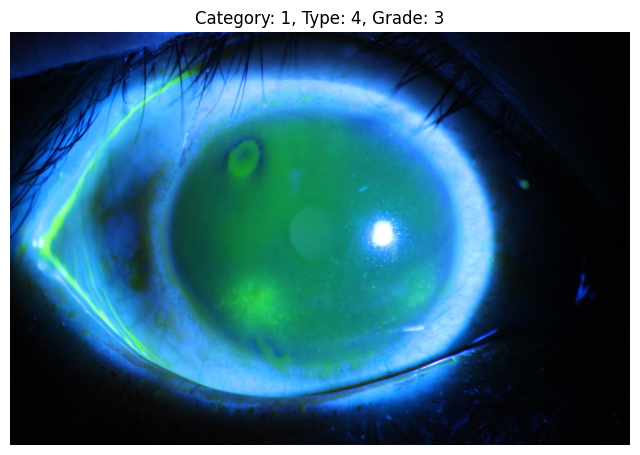

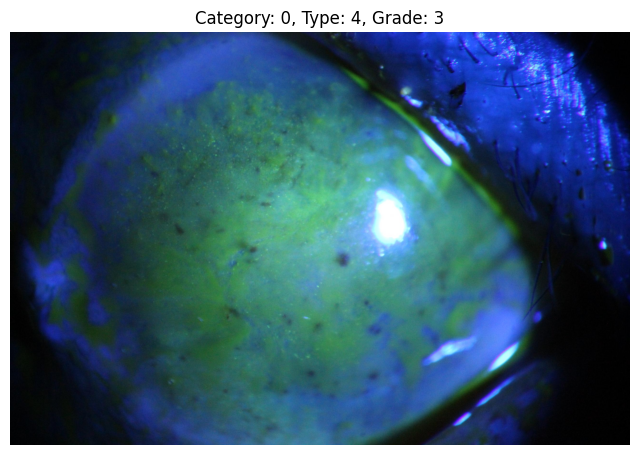

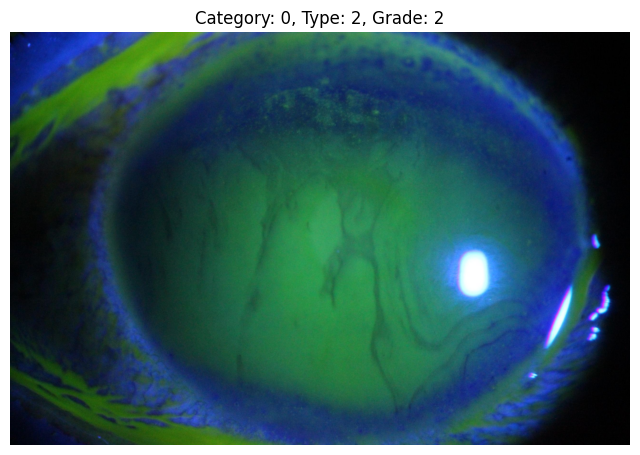

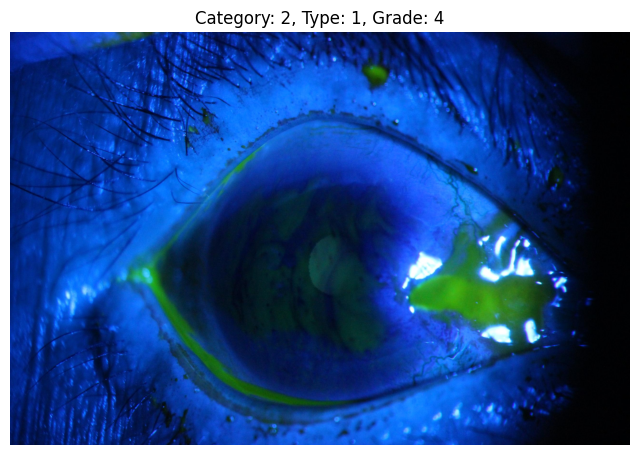

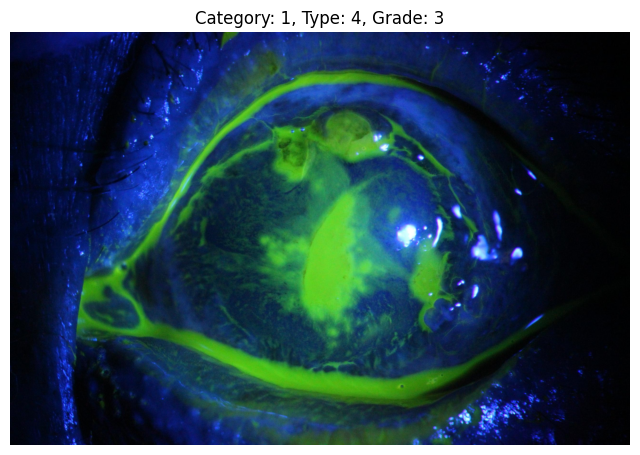

In [4]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

# Directory containing images
image_dir = "/kaggle/input/eye-disease-deep-learning-dataset/dataset/images"

# Load dataset
csv_file_path = "/kaggle/input/eye-disease-deep-learning-dataset/dataset/labels.csv"
dataset = pd.read_csv(csv_file_path)

# Select five random images
random_image_indices = random.sample(range(len(dataset)), 5)

# Display the selected images with labels
for idx in random_image_indices:
    image_path = os.path.join(image_dir, dataset.loc[idx, 'name'])
    image = mpimg.imread(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title(f"Category: {dataset.loc[idx, 'category']}, Type: {dataset.loc[idx, 'type']}, Grade: {dataset.loc[idx, 'grade']}")
    plt.axis('off')
    plt.show()


In [5]:
Type_of_category=df['category'].unique()
Type_of_category

array([0, 1, 2])

In [6]:
Type_of_diseases=df['type'].unique()
Type_of_diseases

array([4, 2, 1, 0, 3])

In [7]:
Type_of_grade=df['grade'].unique()
Type_of_grade

array([3, 2, 1, 0, 4])

In [8]:
dic={}
for i in Type_of_diseases:
    dic[i]=df['type'].value_counts()[i]
    
dic_category={}
for j in Type_of_category:
    dic_category[j]=df['category'].value_counts()[j]
    
dic_grade={}
for k in Type_of_grade:
    dic_grade[k]=df['grade'].value_counts()[k]

print(dic)
print(dic_category)
print(dic_grade)

{4: 548, 2: 40, 1: 78, 0: 36, 3: 10}
{0: 358, 1: 263, 2: 91}
{3: 273, 2: 203, 1: 98, 0: 36, 4: 102}


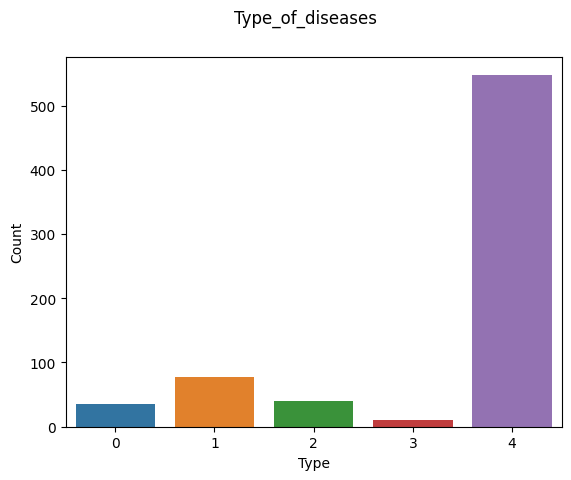

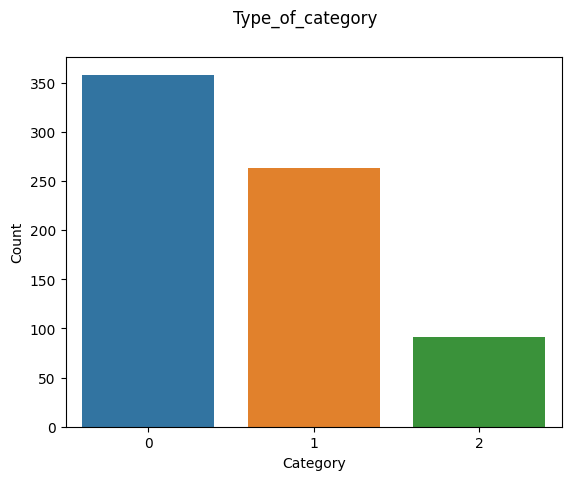

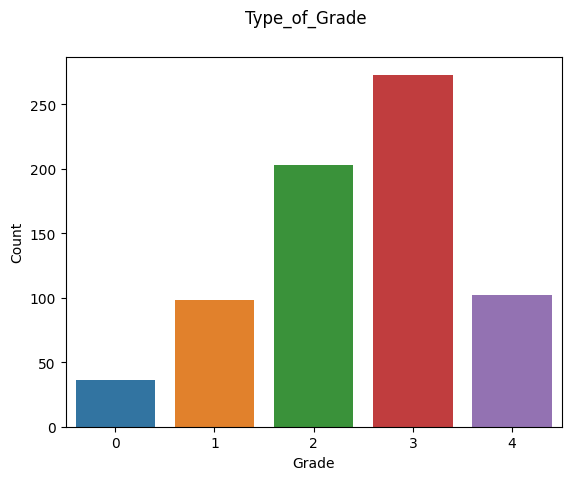

In [9]:
sns.barplot(x = list(dic.keys()), y = list(dic.values()))
plt.suptitle("Type_of_diseases")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
sns.barplot(x = list(dic_category.keys()), y = list(dic_category.values()))
plt.suptitle("Type_of_category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
sns.barplot(x = list(dic_grade.keys()), y = list(dic_grade.values()))
plt.suptitle("Type_of_Grade")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

In [10]:
import cv2
import pandas as pd
import numpy as np
import os

# Load the dataset
dataset = df

# Function to augment images
def augment_image(image_path):
    image = cv2.imread(image_path)
    # Apply augmentation techniques here
    # For example, you can add rotation, flipping, scaling, etc.
    augmented_images = [image]  # Initial image
    # Example: Rotate the image
    rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    augmented_images.append(rotated_image)
    return augmented_images

# Define paths
input_folder = "/kaggle/input/eye-disease-deep-learning-dataset/dataset/images"  # Folder containing original images
output_folder = "augmented_images"  # Folder to store augmented images

# Create output folder if not exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Augment images and append to the dataset
augmented_dataset = []
for index, row in dataset.iterrows():
    image_name = row['name']
    image_path = os.path.join(input_folder, image_name)
    augmented_images = augment_image(image_path)
    for augmented_image in augmented_images:
        augmented_image_name = f"{os.path.splitext(image_name)[0]}_augmented.jpg"
        augmented_image_path = os.path.join(output_folder, augmented_image_name)
        cv2.imwrite(augmented_image_path, augmented_image)
        augmented_row = {
            'name': augmented_image_name,
            'category': row['category'],
            'type': row['type'],
            'grade': row['grade']
        }
        augmented_dataset.append(augmented_row)

# Convert augmented dataset to DataFrame
augmented_dataset_df = pd.DataFrame(augmented_dataset)

# Append augmented dataset to original dataset
combined_dataset = pd.concat([dataset, augmented_dataset_df], ignore_index=True)

# Save combined dataset to CSV
combined_dataset.to_csv("combined_dataset.csv", index=False)


In [11]:
import os
import shutil

# Source and destination paths
source_images_folder = "/kaggle/input/eye-disease-deep-learning-dataset/dataset/images"
destination_images_folder = "/kaggle/working/augmented_images"

# Copy images
if os.path.exists(source_images_folder) and os.path.isdir(source_images_folder):
    if not os.path.exists(destination_images_folder):
        os.makedirs(destination_images_folder)
    # Copy contents of source_images_folder to destination_images_folder
    for file_name in os.listdir(source_images_folder):
        source_file = os.path.join(source_images_folder, file_name)
        destination_file = os.path.join(destination_images_folder, file_name)
        shutil.copyfile(source_file, destination_file)
else:
    print("Source images folder not found.")


In [12]:
df=combined_dataset
df

name  category  type  grade
0                 1.jpg         0     4      3
1                 2.jpg         0     4      3
2                 3.jpg         0     2      2
3                 4.jpg         0     2      1
4                 5.jpg         0     1      3
...                 ...       ...   ...    ...
2131  710_augmented.jpg         2     1      4
2132  711_augmented.jpg         2     3      4
2133  711_augmented.jpg         2     3      4
2134  712_augmented.jpg         2     4      4
2135  712_augmented.jpg         2     4      4

[2136 rows x 4 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      2136 non-null   object
 1   category  2136 non-null   int64 
 2   type      2136 non-null   int64 
 3   grade     2136 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 66.9+ KB


In [14]:
train_image='/kaggle/working/augmented_images'
train_image

'/kaggle/working/augmented_images'

In [15]:
df.nunique()

name        1424
category       3
type           5
grade          5
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      2136 non-null   object
 1   category  2136 non-null   int64 
 2   type      2136 non-null   int64 
 3   grade     2136 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 66.9+ KB


In [17]:
Type_of_category=df['category'].unique()
Type_of_category

array([0, 1, 2])

In [18]:
Type_of_diseases=df['type'].unique()
Type_of_diseases

array([4, 2, 1, 0, 3])

In [19]:
Type_of_grade=df['grade'].unique()
Type_of_grade

array([3, 2, 1, 0, 4])

In [20]:
dic={}
for i in Type_of_diseases:
    dic[i]=df['type'].value_counts()[i]
    
dic_category={}
for j in Type_of_category:
    dic_category[j]=df['category'].value_counts()[j]
    
dic_grade={}
for k in Type_of_grade:
    dic_grade[k]=df['grade'].value_counts()[k]

print(dic)
print(dic_category)
print(dic_grade)

{4: 1644, 2: 120, 1: 234, 0: 108, 3: 30}
{0: 1074, 1: 789, 2: 273}
{3: 819, 2: 609, 1: 294, 0: 108, 4: 306}


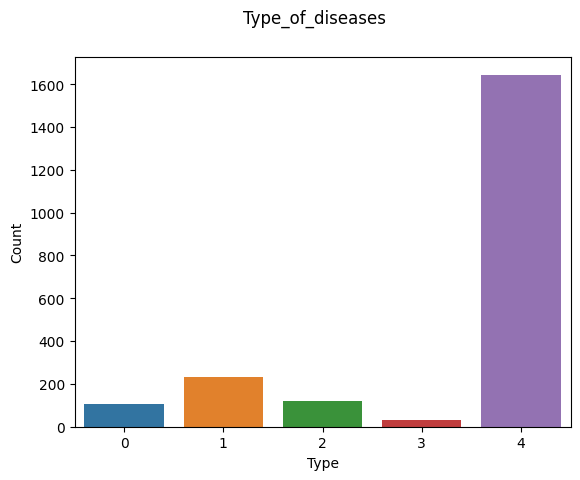

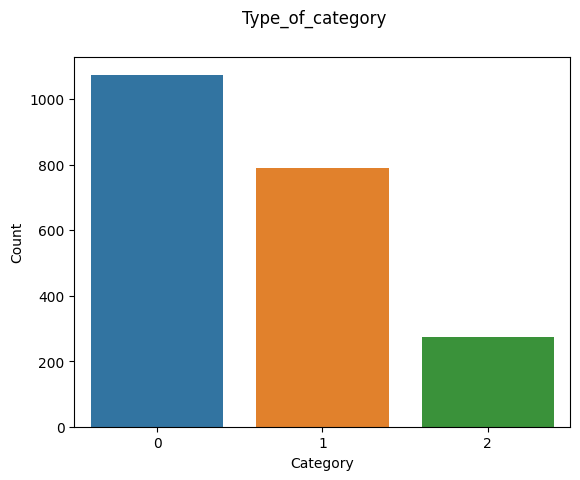

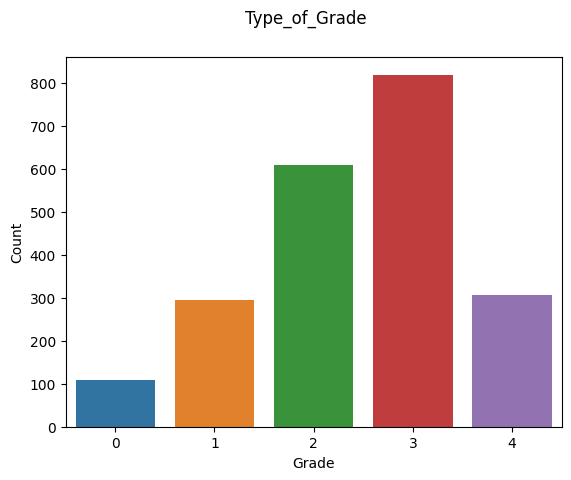

In [21]:
sns.barplot(x = list(dic.keys()), y = list(dic.values()))
plt.suptitle("Type_of_diseases")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()
sns.barplot(x = list(dic_category.keys()), y = list(dic_category.values()))
plt.suptitle("Type_of_category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
sns.barplot(x = list(dic_grade.keys()), y = list(dic_grade.values()))
plt.suptitle("Type_of_Grade")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

## Category

In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tqdm import tqdm

In [23]:
train_images = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img('/kaggle/working/augmented_images/'+df['name'][i], target_size=(224, 224))
    img = image.img_to_array(img)
    img = img/255
#     train_images.append(img)
    train_images.append(img)

X = np.array(train_images)
X[0:10]

100%|██████████| 2136/2136 [00:45<00:00, 46.82it/s]


array([[[[0.00784314, 0.01568628, 0.0627451 ],
         [0.00784314, 0.01568628, 0.0627451 ],
         [0.01176471, 0.01960784, 0.06666667],
         ...,
         [0.00784314, 0.02352941, 0.05882353],
         [0.00392157, 0.01960784, 0.0627451 ],
         [0.00392157, 0.01960784, 0.0627451 ]],

        [[0.00784314, 0.01568628, 0.0627451 ],
         [0.01176471, 0.01960784, 0.06666667],
         [0.01176471, 0.01960784, 0.06666667],
         ...,
         [0.01960784, 0.02745098, 0.11764706],
         [0.00784314, 0.02352941, 0.07058824],
         [0.00784314, 0.02352941, 0.06666667]],

        [[0.01568628, 0.01568628, 0.0627451 ],
         [0.01960784, 0.02745098, 0.07843138],
         [0.01960784, 0.02745098, 0.07843138],
         ...,
         [0.01568628, 0.02745098, 0.16470589],
         [0.00392157, 0.02352941, 0.10196079],
         [0.01176471, 0.01960784, 0.06666667]],

        ...,

        [[0.00784314, 0.02745098, 0.05098039],
         [0.01176471, 0.02745098, 0.0627451 ]

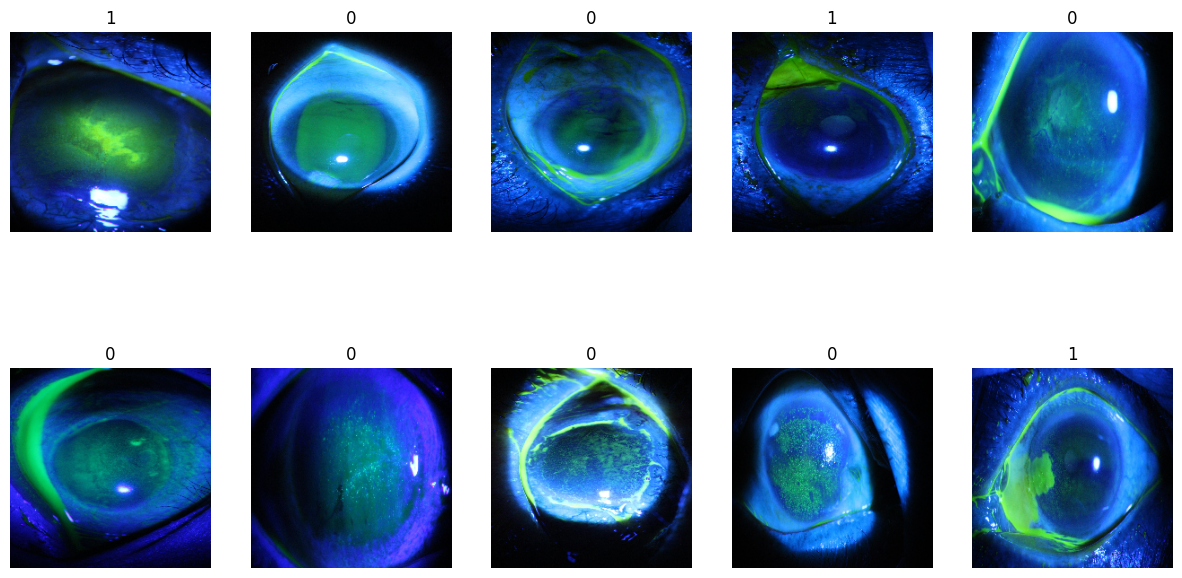

In [24]:
import random

# Select 10 random indices
sample_indices = random.sample(range(len(train_images)), 10)

# Display the images with their corresponding labels
plt.figure(figsize=(15, 8))
for i, idx in enumerate(sample_indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[idx])
    plt.title(df['category'][idx])  # Accessing label directly from DataFrame
    plt.axis('off')
plt.show()


In [25]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['category'].values, test_size=0.3, random_state=42)

In [26]:
# Define the CNN architecture
input_layer = Input(shape=(224, 224, 3))

In [27]:
from tensorflow.keras.regularizers import l2

# Convolutional layers
conv1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)


# Flatten layer
flatten = Flatten()(pool2)

# Fully connected layers with L2 regularization
dense1 = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(flatten)
dropout1 = Dropout(0.7)(dense1)
dense2 = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(dropout1)
dropout2 = Dropout(0.5)(dense2)

# Output layer
output_layer = Dense(len(df['category'].unique()), activation='softmax')(dropout2)

In [28]:
# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    95,552,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,703,491 (365.08 MB)

 Trainable params: 95,703,491 (365.08 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Train the model
history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test),verbose=1)

Epoch 1/10
 2/47 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.4062 - loss: 15.6074  

I0000 00:00:1712711038.279731      76 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712711038.296221      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.4980 - loss: 11.7178

W0000 00:00:1712711057.957413      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712711059.539927      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 484ms/step - accuracy: 0.4990 - loss: 11.6475 - val_accuracy: 0.6552 - val_loss: 3.7969
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.6371 - loss: 3.2831 - val_accuracy: 0.6755 - val_loss: 2.4849
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.6571 - loss: 2.4156 - val_accuracy: 0.6895 - val_loss: 2.1984
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.6770 - loss: 2.1629 - val_accuracy: 0.6693 - val_loss: 1.9792
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.6840 - loss: 1.9676 - val_accuracy: 0.6786 - val_loss: 1.9430
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.6905 - loss: 1.8475 - val_accuracy: 0.6802 - val_loss: 1.7163
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.6823 - loss: 1.7410 - val_accuracy: 0.7176 - val_loss: 1.6951
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.6922 - loss: 1.6739 - val_accuracy: 0.6802 - val_loss:

In [30]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy:", train_accuracy)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

W0000 00:00:1712711095.457435      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Training Accuracy: 0.7424749135971069
Test Accuracy: 0.7098283767700195


In [31]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']


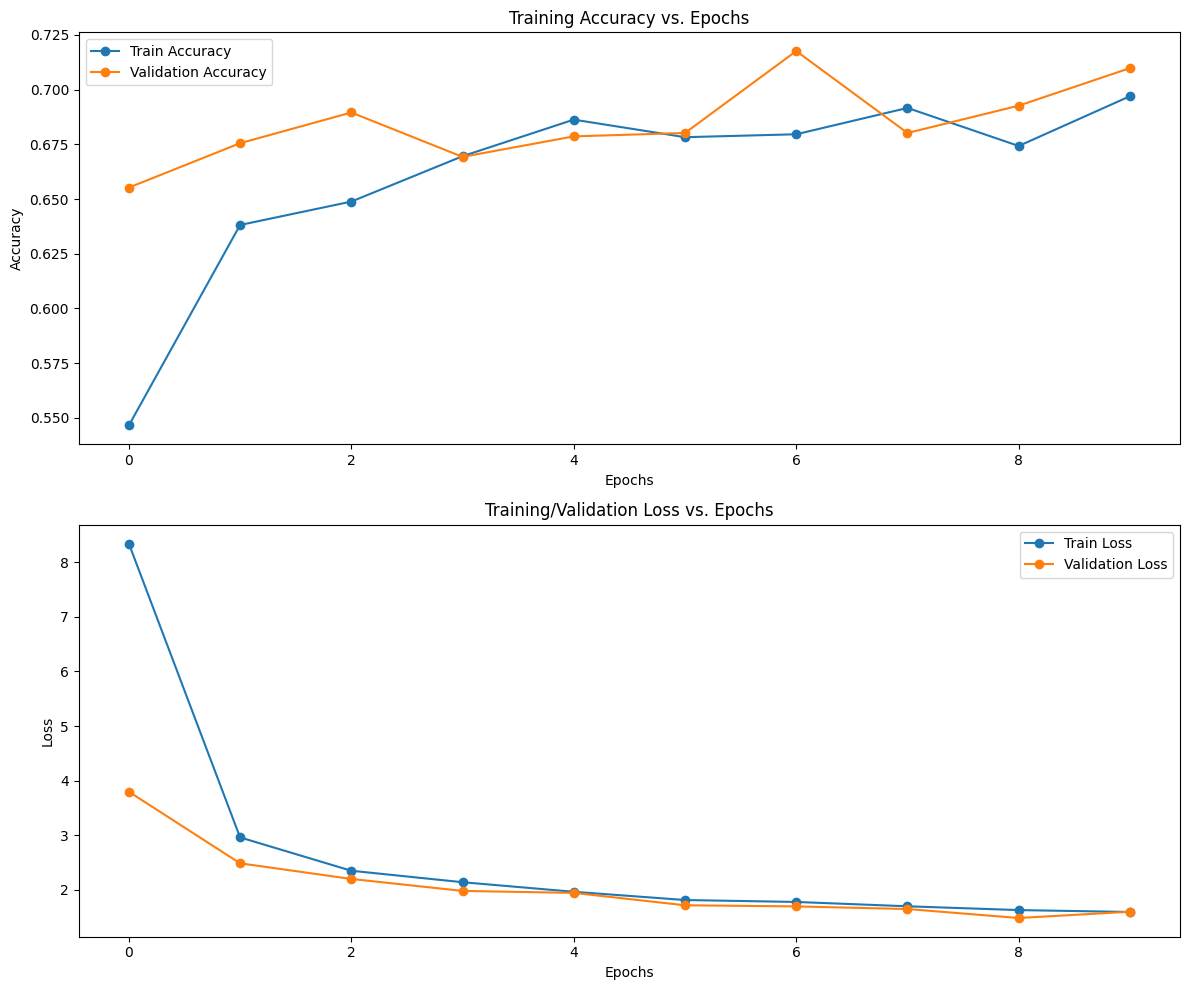

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')


plt.tight_layout()
plt.show()


In [33]:
y_test

array([1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 1,
       0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0,
       1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2,
       1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 2,
       0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 1, 2, 2,
       0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2,
       1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2,

In [34]:
y_pred=model.predict(X_test) 
y_pred

13/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

W0000 00:00:1712711099.893048      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


array([[0.11496064, 0.6053617 , 0.27967766],
       [0.8124261 , 0.13930374, 0.04827021],
       [0.14211792, 0.48963138, 0.36825064],
       ...,
       [0.7428661 , 0.1917757 , 0.0653582 ],
       [0.739417  , 0.1951528 , 0.06543017],
       [0.71049535, 0.21737728, 0.07212738]], dtype=float32)

In [35]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [36]:
y_pred_train=model.predict(X_train) 
y_pred_train

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


W0000 00:00:1712711103.972033      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


array([[0.7444081 , 0.18612091, 0.06947102],
       [0.75861466, 0.17933793, 0.06204733],
       [0.00099893, 0.3321815 , 0.6668196 ],
       ...,
       [0.7831969 , 0.16270022, 0.0541029 ],
       [0.76697975, 0.17371143, 0.05930883],
       [0.68866265, 0.2375215 , 0.0738159 ]], dtype=float32)

In [37]:
y_pred_classes_train = np.argmax(y_pred_train, axis=1)
y_pred_classes_train

array([0, 0, 2, ..., 0, 0, 0])

In [38]:
class_counts = np.bincount(y_train)

# Print the counts
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

Class 0: 764 instances
Class 1: 532 instances
Class 2: 199 instances


In [39]:
class_counts = np.bincount(y_pred_classes_train)

# Print the counts
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

Class 0: 873 instances
Class 1: 557 instances
Class 2: 65 instances


In [40]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78       310
           1       0.70      0.70      0.70       257
           2       0.59      0.14      0.22        74

    accuracy                           0.71       641
   macro avg       0.67      0.56      0.57       641
weighted avg       0.70      0.71      0.68       641



## Type

In [41]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, df['type'].values, test_size=0.3, random_state=42)

In [42]:
# from tensorflow.keras.regularizers import l2

# input_layer1 = Input(shape=(224, 224, 3))
 
# # Convolutional layers
# conv01 = Conv2D(16, (3, 3), activation='relu')(input_layer1)
# pool01 = MaxPooling2D(pool_size=(2, 2))(conv01)
# conv11 = Conv2D(32, (3, 3), activation='relu')(pool01)
# pool11 = MaxPooling2D(pool_size=(2, 2))(conv11)
# conv21 = Conv2D(64, (3, 3), activation='relu')(pool11)
# pool21 = MaxPooling2D(pool_size=(2, 2))(conv21)
# conv31 = Conv2D(128, (3, 3), activation='relu')(pool21)
# pool21 = MaxPooling2D(pool_size=(2, 2))(conv31)

# # Flatten layer
# flatten1 = Flatten()(pool21)

# # Fully connected layers with L2 regularization
# dense11 = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(flatten1)
# dropout11 = Dropout(0.5)(dense11)
# # dense21 = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(dropout11)
# # dropout21 = Dropout(0.3)(dense21)


# # Output layer
# output_layer1 = Dense(len(df['type'].unique()), activation='softmax')(dropout11)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2

# Load MobileNetV2 base model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze layers in the base model (optional, depending on fine-tuning strategy)
for layer in base_model.layers:
    layer.trainable = False

# Add custom head for classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(5, activation='softmax')(x)  # Assuming 5 output classes

# Create a new model
model1 = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model1.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,587,205 (9.87 MB)

 Trainable params: 329,221 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [43]:
# # Create the model
# model1 = Model(inputs=input_layer1, outputs=output_layer1)

# # Compile the model
# model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Print model summary
# model1.summary()

In [44]:
model1.fit(X_train1, y_train1, epochs=9, batch_size=64, validation_data=(X_test1, y_test1),verbose=1)

Epoch 1/9
 3/24 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.4922 - loss: 1.5320

W0000 00:00:1712711126.666709      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.6672 - loss: 1.1640

W0000 00:00:1712711135.549144      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712711139.830197      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


24/24 ━━━━━━━━━━━━━━━━━━━━ 33s 746ms/step - accuracy: 0.6696 - loss: 1.1560 - val_accuracy: 0.7941 - val_loss: 0.6023
Epoch 2/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.7969 - loss: 0.6313 - val_accuracy: 0.8003 - val_loss: 0.5369
Epoch 3/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.7884 - loss: 0.6106 - val_accuracy: 0.8066 - val_loss: 0.5066
Epoch 4/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.8269 - loss: 0.5122 - val_accuracy: 0.8190 - val_loss: 0.4816
Epoch 5/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.8174 - loss: 0.5090 - val_accuracy: 0.8144 - val_loss: 0.4681
Epoch 6/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.8437 - loss: 0.4434 - val_accuracy: 0.8253 - val_loss: 0.4520
Epoch 7/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.8710 - loss: 0.4008 - val_accuracy: 0.8034 - val_loss: 0.5213
Epoch 8/9
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.8536 - loss: 0.4218 - val_accuracy: 0.8175 - val_loss: 0.4521


In [45]:
# Evaluate the model
train_loss1, train_accuracy1 = model1.evaluate(X_train1, y_train1, verbose=0)
print("Training Accuracy:", train_accuracy1)
test_loss1, test_accuracy1 = model1.evaluate(X_test1, y_test1, verbose=0)
print("Test Accuracy:", test_accuracy1)

W0000 00:00:1712711168.675526      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712711171.884414      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Training Accuracy: 0.9117056727409363
Test Accuracy: 0.8439937829971313


In [46]:
y_test1

array([4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 1, 4, 4, 4, 4, 4, 4, 2, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 2, 4, 3,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4,
       1, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4,
       4, 4, 4, 4, 2, 1, 4, 4, 4, 4, 2, 4, 4, 4, 0, 4, 3, 4, 4, 1, 4, 4,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 2, 1, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 2, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 3, 2, 4, 4, 4, 1, 0, 4, 4, 4, 4, 4, 4, 1, 2, 4, 4, 4, 4, 1, 4,
       4, 4, 4, 2, 4, 1, 4, 4, 4, 4, 4, 2, 4, 4, 4, 1, 4, 3, 4, 2, 4, 3,
       4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,

In [47]:
y_pred1=model1.predict(X_test1) 
y_pred1

 7/21 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

W0000 00:00:1712711178.162781      78 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step


array([[7.1491150e-04, 1.4366009e-02, 1.1934218e-02, 1.4874656e-03,
        9.7149736e-01],
       [1.3564704e-03, 3.7011523e-02, 8.4303916e-03, 1.3374203e-03,
        9.5186424e-01],
       [3.3516585e-04, 4.8168083e-03, 5.9732371e-03, 8.4222178e-04,
        9.8803258e-01],
       ...,
       [2.8155567e-02, 1.7092071e-01, 2.0548123e-01, 1.8036196e-02,
        5.7740629e-01],
       [9.0642148e-05, 6.7582685e-03, 1.7498923e-03, 1.7927501e-03,
        9.8960847e-01],
       [4.4775687e-04, 4.0552160e-04, 1.9910794e-03, 1.6812988e-03,
        9.9547428e-01]], dtype=float32)

In [48]:
y_pred_classes1 = np.argmax(y_pred1, axis=1)
y_pred_classes1

array([4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,
       4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 2, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 1, 4, 4, 4, 1, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4,
       4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,

In [49]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_test1,y_pred_classes1))

              precision    recall  f1-score   support

           0       0.67      0.12      0.21        33
           1       0.70      0.54      0.61        61
           2       1.00      0.19      0.33        36
           3       0.00      0.00      0.00         9
           4       0.86      0.99      0.92       502

    accuracy                           0.84       641
   macro avg       0.64      0.37      0.41       641
weighted avg       0.83      0.84      0.81       641



In [50]:
y_pred1_train=model1.predict(X_train1) 
y_pred1

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step


W0000 00:00:1712711187.762596      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


array([[7.1491150e-04, 1.4366009e-02, 1.1934218e-02, 1.4874656e-03,
        9.7149736e-01],
       [1.3564704e-03, 3.7011523e-02, 8.4303916e-03, 1.3374203e-03,
        9.5186424e-01],
       [3.3516585e-04, 4.8168083e-03, 5.9732371e-03, 8.4222178e-04,
        9.8803258e-01],
       ...,
       [2.8155567e-02, 1.7092071e-01, 2.0548123e-01, 1.8036196e-02,
        5.7740629e-01],
       [9.0642148e-05, 6.7582685e-03, 1.7498923e-03, 1.7927501e-03,
        9.8960847e-01],
       [4.4775687e-04, 4.0552160e-04, 1.9910794e-03, 1.6812988e-03,
        9.9547428e-01]], dtype=float32)

In [51]:
y_pred_classes1_train = np.argmax(y_pred1_train, axis=1)
y_pred_classes1_train

array([4, 4, 4, ..., 2, 4, 4])

In [52]:
class_counts = np.bincount(y_pred_classes1_train)

# Print the counts
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

Class 0: 49 instances
Class 1: 155 instances
Class 2: 40 instances
Class 3: 6 instances
Class 4: 1245 instances


In [53]:
y_train1

array([4, 4, 4, ..., 2, 4, 0])

In [54]:
class_counts = np.bincount(y_train1)

# Print the counts
for class_label, count in enumerate(class_counts):
    print(f"Class {class_label}: {count} instances")

Class 0: 75 instances
Class 1: 173 instances
Class 2: 84 instances
Class 3: 21 instances
Class 4: 1142 instances


## Grade 

In [55]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, df['grade'].values, test_size=0.3, random_state=42)

In [56]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2

# Load MobileNetV2 base model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze layers in the base model (optional, depending on fine-tuning strategy)
for layer in base_model.layers:
    layer.trainable = False

# Add custom head for classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(5, activation='softmax')(x)  # Assuming 5 output classes

# Create a new model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,587,205 (9.87 MB)

 Trainable params: 329,221 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [57]:
# # Unfreeze some layers of the base model for fine-tuning
# for layer in base_model.layers[-20:]:
#     layer.trainable = True

# # Recompile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Continue training
# history_fine = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


# Train the model
history = model.fit(X_train2, y_train2, epochs=25, batch_size=32, validation_split=0.2,verbose=1)


Epoch 1/25
 5/38 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.2748 - loss: 2.1709

W0000 00:00:1712711202.594626      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.3586 - loss: 1.7495

W0000 00:00:1712711210.091202      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712711213.466798      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


38/38 ━━━━━━━━━━━━━━━━━━━━ 25s 425ms/step - accuracy: 0.3591 - loss: 1.7447 - val_accuracy: 0.3746 - val_loss: 1.3306
Epoch 2/25
 5/38 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5026 - loss: 1.2325

W0000 00:00:1712711218.329579      76 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4828 - loss: 1.2286 - val_accuracy: 0.4615 - val_loss: 1.2251
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5271 - loss: 1.1567 - val_accuracy: 0.4916 - val_loss: 1.1804
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5573 - loss: 1.0785 - val_accuracy: 0.5050 - val_loss: 1.1598
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5664 - loss: 1.0083 - val_accuracy: 0.5050 - val_loss: 1.1782
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5976 - loss: 0.9619 - val_accuracy: 0.5151 - val_loss: 1.1384
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6725 - loss: 0.8557 - val_accuracy: 0.5318 - val_loss: 1.0780
Epoch 8/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6442 - loss: 0.8757 - val_accuracy: 0.5585 - val_loss: 1.0853
Epoch 9/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6718 - loss: 0.8247 - val_accuracy: 0.5518 - val_loss: 1.

In [58]:
# Evaluate the model
train_loss2, train_accuracy2 = model.evaluate(X_train2, y_train2, verbose=0)
print("Training Accuracy:", train_accuracy2)
test_loss2, test_accuracy2 = model.evaluate(X_test2, y_test2, verbose=0)
print("Test Accuracy:", test_accuracy2)

W0000 00:00:1712711259.764708      79 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Training Accuracy: 0.9277591705322266
Test Accuracy: 0.6521061062812805


In [59]:
y_test2

array([3, 2, 2, 3, 2, 2, 2, 4, 3, 2, 4, 1, 4, 2, 2, 3, 2, 3, 3, 3, 2, 3,
       3, 4, 3, 3, 3, 2, 3, 1, 3, 3, 2, 3, 4, 1, 3, 4, 3, 4, 3, 3, 2, 3,
       2, 3, 3, 4, 3, 1, 3, 2, 2, 3, 2, 2, 2, 4, 4, 3, 1, 1, 3, 2, 3, 4,
       3, 2, 3, 2, 0, 3, 2, 3, 2, 2, 2, 4, 3, 1, 2, 0, 2, 3, 3, 2, 4, 2,
       1, 3, 3, 2, 2, 3, 2, 3, 1, 1, 3, 3, 4, 3, 2, 3, 3, 3, 2, 3, 1, 3,
       2, 3, 3, 3, 4, 1, 2, 3, 3, 3, 2, 1, 2, 4, 3, 3, 3, 3, 2, 4, 2, 3,
       3, 2, 2, 4, 4, 3, 2, 3, 3, 0, 3, 2, 2, 2, 0, 3, 4, 1, 4, 3, 3, 2,
       1, 2, 3, 3, 3, 2, 3, 3, 3, 4, 3, 3, 2, 3, 1, 1, 1, 2, 1, 2, 4, 4,
       3, 3, 3, 4, 3, 4, 2, 2, 1, 1, 3, 3, 2, 3, 0, 2, 3, 3, 2, 1, 2, 3,
       2, 1, 3, 4, 3, 2, 4, 2, 2, 4, 2, 2, 3, 3, 3, 3, 2, 4, 4, 3, 3, 3,
       3, 4, 3, 0, 1, 2, 0, 0, 2, 2, 3, 2, 3, 1, 4, 3, 2, 4, 3, 3, 3, 4,
       3, 3, 2, 3, 1, 2, 4, 0, 4, 2, 4, 2, 3, 3, 4, 2, 3, 3, 3, 3, 4, 4,
       2, 4, 4, 1, 2, 2, 2, 2, 2, 4, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 4,
       2, 1, 3, 3, 4, 3, 4, 2, 1, 3, 1, 3, 3, 3, 4,

In [60]:
y_pred2=model.predict(X_test2) 
y_pred2

 7/21 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

W0000 00:00:1712711267.623762      77 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step


array([[1.78253418e-03, 1.16732366e-01, 3.47520947e-01, 5.00069499e-01,
        3.38947400e-02],
       [6.19547849e-04, 5.84676396e-03, 8.95258963e-01, 9.80479792e-02,
        2.26731849e-04],
       [1.25373388e-03, 5.95454164e-02, 4.32266444e-01, 4.77974355e-01,
        2.89599784e-02],
       ...,
       [2.17663571e-02, 8.26797009e-01, 1.15592875e-01, 3.06118466e-02,
        5.23187779e-03],
       [2.75201892e-04, 2.11949367e-02, 2.93173548e-02, 9.48026180e-01,
        1.18630985e-03],
       [7.62526906e-05, 1.64887728e-03, 8.95743728e-01, 1.02426395e-01,
        1.04624312e-04]], dtype=float32)

In [61]:
y_pred_classes2 = np.argmax(y_pred2, axis=1)
y_pred_classes2

array([3, 2, 3, 3, 2, 2, 2, 4, 2, 3, 3, 1, 1, 2, 2, 3, 3, 3, 3, 3, 2, 2,
       4, 4, 3, 3, 3, 2, 3, 4, 3, 2, 2, 3, 4, 1, 3, 1, 3, 4, 3, 3, 0, 3,
       2, 3, 3, 3, 1, 1, 3, 3, 2, 4, 4, 2, 2, 4, 4, 3, 1, 2, 3, 2, 3, 3,
       3, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 3, 2, 3, 2, 3, 3, 4, 2, 4, 4,
       1, 3, 3, 3, 2, 4, 2, 3, 1, 4, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 3, 1,
       3, 2, 3, 3, 2, 1, 2, 3, 3, 2, 3, 1, 1, 3, 3, 3, 4, 3, 3, 4, 2, 2,
       3, 2, 2, 4, 1, 2, 2, 3, 3, 2, 3, 2, 3, 3, 0, 3, 4, 3, 4, 3, 3, 3,
       1, 2, 3, 3, 3, 2, 3, 2, 2, 4, 3, 3, 3, 4, 1, 2, 1, 2, 2, 2, 2, 3,
       3, 2, 3, 3, 3, 4, 0, 1, 4, 1, 3, 3, 3, 3, 0, 2, 3, 3, 2, 1, 1, 3,
       3, 2, 3, 4, 2, 1, 0, 4, 2, 4, 4, 2, 3, 2, 3, 3, 3, 4, 2, 3, 3, 3,
       3, 4, 2, 2, 1, 2, 1, 0, 2, 2, 3, 2, 1, 2, 4, 3, 2, 4, 3, 4, 4, 4,
       3, 3, 2, 3, 1, 3, 4, 2, 4, 2, 3, 2, 3, 3, 4, 1, 3, 3, 2, 3, 2, 4,
       3, 3, 4, 1, 1, 3, 2, 3, 2, 1, 4, 2, 3, 2, 1, 1, 3, 3, 1, 3, 3, 2,
       2, 1, 3, 3, 4, 2, 4, 2, 1, 3, 2, 3, 3, 3, 4,

In [62]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(y_test2,y_pred_classes2))

              precision    recall  f1-score   support

           0       0.67      0.36      0.47        33
           1       0.56      0.61      0.58        89
           2       0.61      0.59      0.60       184
           3       0.72      0.78      0.75       245
           4       0.65      0.59      0.62        90

    accuracy                           0.65       641
   macro avg       0.64      0.59      0.60       641
weighted avg       0.65      0.65      0.65       641

